In [16]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

opti='RMSprop'

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer=opti, optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)

In [17]:
trainer.train()

train loss:2.2742897185847135
=== epoch:1, train acc:0.237, test acc:0.237 ===
train loss:2.0755352709580217
train loss:1.8108659052575249
train loss:1.6372456779071884
train loss:1.712396215983947
train loss:1.2578373739042852
train loss:1.10054962220269
train loss:1.1080182130794793
train loss:1.2104489128691087
train loss:0.828311631374026
train loss:0.7849868994524463
train loss:0.7963069084492135
train loss:0.616519273530875
train loss:0.6888839986377212
train loss:0.7915524784176681
train loss:0.750906973742252
train loss:0.741586405132094
train loss:0.5340016003765442
train loss:0.5846033065712174
train loss:0.42934730502404383
train loss:0.4870979940187776
train loss:0.46874266575881185
train loss:0.33729866999444963
train loss:0.36496405522844716
train loss:0.4527314531477999
train loss:0.41384186782353977
train loss:0.595011941697425
train loss:0.43931472006097105
train loss:0.27822641232306267
train loss:0.2654544336749142
train loss:0.27941997534768936
train loss:0.57035749

train loss:0.1254134919452327
train loss:0.03194857580941106
train loss:0.08804626218846119
train loss:0.03390234069183233
train loss:0.053401264521164074
train loss:0.0377802952836314
train loss:0.08170385303437694
train loss:0.09645458431593833
train loss:0.05025900027654745
train loss:0.12908530816140376
train loss:0.06125528151969518
train loss:0.06427850949779329
train loss:0.04214510820820047
train loss:0.08384460143014923
train loss:0.17093446498605178
train loss:0.02701694777344503
train loss:0.0530996775418452
train loss:0.059306868730565225
train loss:0.04738403325582917
train loss:0.047883149937973955
train loss:0.07992465604943248
train loss:0.03881453680087354
train loss:0.06510727444403311
train loss:0.09982145724217116
train loss:0.05707411874176275
train loss:0.044530543097797165
train loss:0.1026328606399383
train loss:0.04494980778498894
train loss:0.025920533653412892
train loss:0.0557242942481476
train loss:0.08272802417955759
train loss:0.04216850950408833
train lo

train loss:0.011837486475198616
train loss:0.023686894848259775
train loss:0.012886025435861809
train loss:0.04252879131957203
train loss:0.014516448274322967
train loss:0.03051819319393665
train loss:0.02067565956153437
train loss:0.021086924193312644
train loss:0.007794613508409868
train loss:0.00884642859391071
train loss:0.016280165579609762
train loss:0.033352401264168025
train loss:0.011209563214736378
train loss:0.015200394084544178
train loss:0.010905924822409582
train loss:0.05397847140736874
train loss:0.007037984384409269
train loss:0.014058666495551446
train loss:0.014350222257375771
train loss:0.031596283761895466
train loss:0.010653199863731803
train loss:0.0436387200955656
train loss:0.02026339842064205
train loss:0.02483489891456807
train loss:0.028767204845875315
train loss:0.012922052308064709
train loss:0.01838565587583223
train loss:0.010300487008143993
train loss:0.014378097325880333
train loss:0.024288921101398294
train loss:0.008656070938873151
train loss:0.01721

train loss:0.005548205036036066
train loss:0.002285591113278238
train loss:0.002948322851471195
train loss:0.004310403856940621
train loss:0.0037781797867253797
train loss:0.0028818119147124483
train loss:0.014310795219576854
train loss:0.028995378468887383
train loss:0.0045570429187622155
train loss:0.008950500479972397
train loss:0.004289079999072621
train loss:0.005202214428612482
train loss:0.002396699672964216
train loss:0.0034068359858082076
train loss:0.0024305566677412767
train loss:0.004889106354443868
train loss:0.025590462805352977
train loss:0.0018197927780436328
train loss:0.00675764292024751
train loss:0.007315409736903608
train loss:0.0035875932936379495
train loss:0.0035021079087300777
train loss:0.002322553691284301
train loss:0.0036237239585245346
train loss:0.0025019871231622788
train loss:0.0059072350938408225
train loss:0.004045676368529753
train loss:0.0053035416119591216
train loss:0.0015517201766000648
train loss:0.00379325774630024
train loss:0.0035604858868656

In [18]:
# パラメータの保存
network.save_params(opti + ".params.pkl")
print("Saved Network Parameters!")

Saved Network Parameters!


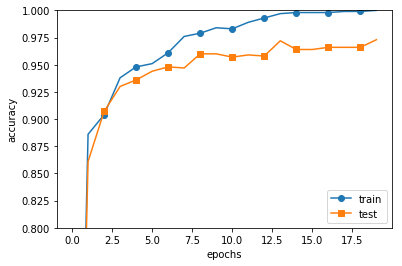

In [19]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.8, 1.0)
plt.legend(loc='lower right')
plt.show()